<a href="https://colab.research.google.com/github/pumazzo/ML4HS-UC/blob/main/Notebook_2_ML4HS_UC2023_LR_KNN_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to machine learning for health sciences
## Lesson 2 ***Pipeline supervised ***


In this notebook we will see:
-  Dataset creation. A liner separable dataset/ a non-linear separable dataset.
  - Gaussian "Balls"
  - Concentric circles
- Split train / validation / test
- Cross validation
- Supervised learning with two models:
  - logistic regression LR (a linear model)
  - k-NN (a non linear one)
- Performance evaluation
- A trick: feature engineering?


In this notebook we will compare LR and K-NN on two different simple problems.
We will also review a bit of python syntax.

# Step 1 - repeat the creation and visualization of dataset 1

 Coding advice: it is better to avoid the creation of temporary varibles in the notebook. It is also better to write "modular" code. Let's try to work with functions.

 - Variable defined inside a function (scope) will be deleted once the funcion ends.
 - Using function helps maitaining the code clean and readable


In [44]:
# Example of a function in python (and its quirks)


def function_without_args(): # when this function is called it returns a string

  return"I am the output of a function" # return interrupts execution of a function and returns the argument value of return

output_funzione = function_without_args()

print(output_funzione)

I am the output of a function


In [61]:
# a function can depend on variables passed as arguments

def function_with_args(valore):
  return "my argument is {}".format(valore)

output_funzione = function_with_args(4)

print(output_funzione)

my argument is 4


In [64]:
# Arbitrary code can be executed in a function and "return" is unnecessary if you don't want to pass variables
# in python functions access variables defined in the "notebook" but not vice versa.
#
defined_outside = "ML@UC"

def print_string():
  mystring= "this variable is defined in the function, the one below is not"
  print(mystring)
  print(defined_outside)

print_string()
#print(mystring)

this variable is defined in the function, the one below is not
ML@UC


In [66]:
# if we reassign a variable this doesn't change the external variable
def print_defined_inside():
  defined_outside = "I change its value inside the function"

  print("the variable changes only in the function : \n",defined_outside)

print_defined_inside()

# la variabile originale non è stata toccata

print("the original variable is still with us : \n", defined_outside)

the variable changes only in the function : 
 I change its value inside the function
the original variable is still with us : 
 ML@UC


In [48]:
# beware that python is treacherous. If we change the content of a variable this will instead take effect in the notebook.
# all these strange things are the result of a concept that the passage as a "copy" or as a "reference".
#The matter is complicated and it is not important now but the message is that you have to be careful

In [67]:
my_list = ["cane","gatto","topo"]
print(my_list)
def funzione_su_lista(my_list):
  my_list[1]="cammello"


funzione_su_lista(my_list)# execute function, beware that I lose the original content in my_list
print(my_list)

# to avoid you can pass a variable as a copy explicitly
my_list = ["cane","gatto","topo"]
print(my_list)
funzione_su_lista(my_list.copy())# arg passed as a copy
print(my_list)

['cane', 'gatto', 'topo']
['cane', 'cammello', 'topo']
['cane', 'gatto', 'topo']
['cane', 'gatto', 'topo']


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# this function has default values!!!!!

Npoints= 1000
def get_dataset_ball(Npoints ,mu1=np.array([1,1]),  mu2  =np.array([-1,-1]),sigma=0.1):


  D = 2
  cov1 = sigma*np.array([[3, 1], [1, 2]])

  d1 =  np.random.randn(Npoints, D)@ np.linalg.cholesky(cov1) + mu1
  d2 = sigma*np.random.randn(Npoints, D) + mu2

  # concatenate classes
  data= np.concatenate([d1,d2],axis=0)
  labels = np.concatenate([np.zeros(Npoints),np.ones(Npoints)],axis=0)
  print(data.shape)
  print(labels.shape)
  return data, labels

X1, y1 = get_dataset_ball(Npoints)

(2000, 2)
(2000,)


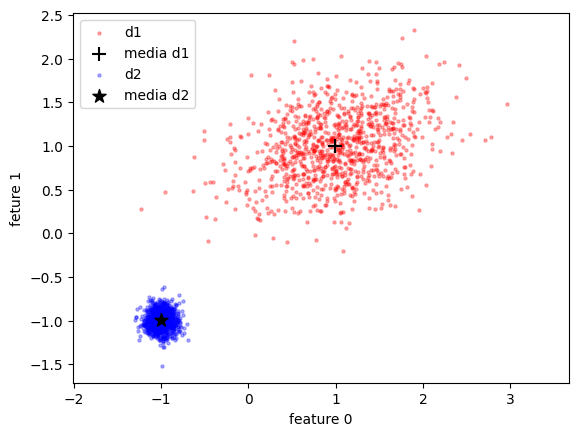

In [100]:
def plot_dataset(X,y,PLTDL = False,marray=[],barray=[]):

  f,ax = plt.subplots(1)
  d1 = X[y==0,:]
  d2 = X[y==1,:]
  ax.scatter(d1[:,0],d1[:,1],s=5,alpha=0.3,color="r",label="d1")
  ax.scatter(d1[:,0].mean(),d1[:,1].mean(),s=100,alpha=1,marker="+",color="k",label="media d1")
  ax.scatter(d2[:,0],d2[:,1],s=5,alpha=0.3,color="b",label="d2")
  ax.scatter(d2[:,0].mean(),d2[:,1].mean(),s=100,alpha=1,marker="*",color="k",label="media d2")
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feture 1")
  ax.axis('equal')
  plt.legend()
  if PLTDL:

    # plot the decision curve
    for m,c in zip(marray,barray):
      t=np.linspace(-4,6,100)
      ax.scatter(t,m*t+c,s=10,alpha=1,marker=".",color="k",label="separation")





plot_dataset(X1,y1)

In [70]:

def get_dataset_circle(Npoints, sigma=0.5):
  # Radius of the inner circle (class 0)
  radius_inner_circle = 2

  # Radius of the outer circle (class 1)
  radius_outer_circle = 5

  # Generate random angles for the circles
  theta_inner_circle = 2 * np.pi * np.random.rand(Npoints)
  theta_outer_circle = 2 * np.pi * np.random.rand(Npoints)

  # Generate points for class 0 (inner circle)
  x_inner_circle = radius_inner_circle * np.cos(theta_inner_circle)
  y_inner_circle = radius_inner_circle * np.sin(theta_inner_circle)

  # Generate points for class 1 (outer circle)
  x_outer_circle = radius_outer_circle * np.cos(theta_outer_circle)
  y_outer_circle = radius_outer_circle * np.sin(theta_outer_circle)

  # Create labels for the classes
  labels_inner_circle = np.zeros(Npoints)
  labels_outer_circle = np.ones(Npoints)

  # Concatenate the points and labels for the two classes
  X = np.concatenate((np.vstack((x_inner_circle, y_inner_circle)).T, np.vstack((x_outer_circle, y_outer_circle)).T))

  X = X + sigma*np.random.randn(*X.shape)# this is a tu
  y = np.concatenate((labels_inner_circle, labels_outer_circle))
  return X, y


X2,y2 = get_dataset_circle(Npoints, sigma=0.5)

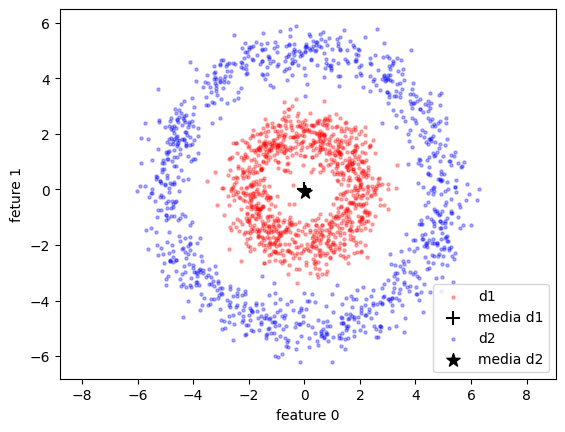

In [71]:
plot_dataset(X2,y2)

# We now split the data.
## we will use a random selection
After remoring the test set we are going to perform the cross validation

In [54]:
# Splitting data
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)



In [55]:
from sklearn.model_selection import KFold# look for it on the documentation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# this is the cross validation

kf = KFold(n_splits=4)
for i,(train, validation) in enumerate(kf.split(X1_train)): # train, test are the indices for each fold
  print(" test size for fold {}  : {}".format(i,len(validation)))
  print(validation)

 test size for fold 0  : 335
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 2

In [74]:
myarray= np.random.rand(10)

In [77]:
print(myarray)
print(myarray[[1,2,4]])

[0.98947759 0.36658449 0.13118219 0.24575311 0.2899375  0.20235361
 0.47655113 0.18729093 0.09079088 0.6110451 ]
[0.36658449 0.13118219 0.2899375 ]


In [97]:
# we will wrap everything as a function so it is easier to analize the two datasets
def compare_accuracy(X1_train,y1_train):
  accuracyLR = []# create an array to store solutions
  accuracyKNN = []
  marray= []
  barray=[]
  for i,(train, validation) in enumerate(kf.split(X1_train)):
    Xt = X1_train[train]
    Xv = X1_train[validation]
    yt = y1_train[train]
    yv = y1_train[validation]

    LR = LogisticRegression(random_state=0).fit(Xt, yt)
    KNN = KNeighborsClassifier(n_neighbors=5).fit(Xt, yt)
    a1,a2 = LR.coef_[0]# parameters of the model
    b = LR.intercept_
    m=-a1/a2
    c=-b/a2

    predLR = LR.score(Xv,yv)
    predKNN = KNN.score(Xv,yv)

    accuracyLR.append(predLR)
    accuracyKNN.append(predKNN)

    marray.append(m)
    barray.append(c)

  print("LR : mean accuracy is {:1.3f} +/- {:1.3f}".format(np.mean(accuracyLR),np.std(accuracyLR)))
  print("KNN : mean accuracy is {:1.3f} +/- {:1.3f}".format(np.mean(accuracyKNN),np.std(accuracyKNN)))

  return accuracyLR, accuracyKNN, marray, barray



In [98]:
accuracyLR, accuracyKNN,_,_  = compare_accuracy(X1_train,y1_train)

LR : mean accuracy is 0.999 +/- 0.003
KNN : mean accuracy is 0.999 +/- 0.001


In [99]:
accuracyLR, accuracyKNN , marray, barray  = compare_accuracy(X2_train,y2_train)

LR : mean accuracy is 0.557 +/- 0.063
KNN : mean accuracy is 0.998 +/- 0.001


In [96]:
barray

[array([0.01851584]),
 array([-0.00390036]),
 array([-0.02462062]),
 array([-0.07667051])]

#Exercise! (here or at home, depending on what time it is)
- Why is the linear classifier good for DATASET1 and not good for DATASET2?
- use notebook code 1 to graph the decision surface in the case of DATASET 2

# How can we solve the problem for LR?
often a simple feature transformation solves the problem. Applying nonlinear operations in feature space allows nonlinear classifiers to exploit relationships to which they do not naturally have access.

Find a transformation of the data (feature engineering) that solves the problem

LR : mean accuracy is 0.999 +/- 0.001
KNN : mean accuracy is 0.996 +/- 0.001


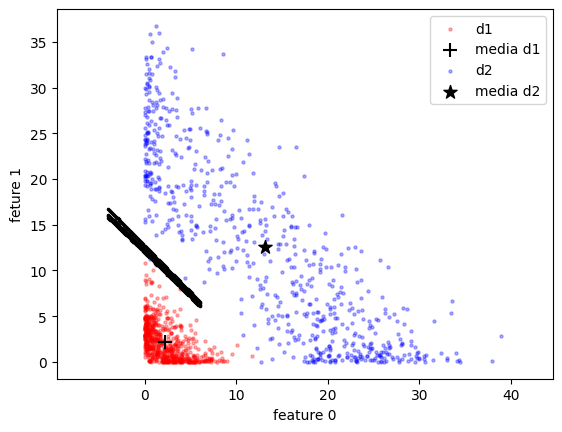

In [103]:

accuracyLR, accuracyKNN,marray,barray  = compare_accuracy(X2_train**2,y2_train)
plot_dataset(X2_train**2,y2_train,PLTDL = True, marray=marray,barray=barray)#




In [89]:
R = X2_train[:,0]**2 + X2_train[:,1]**2
tmpdataset = X2_train.copy()
tmpdataset[:,0] = R
tmpdataset[:,1] = X2_train[:,1]

LR : mean accuracy is 0.999 +/- 0.001
KNN : mean accuracy is 0.997 +/- 0.000


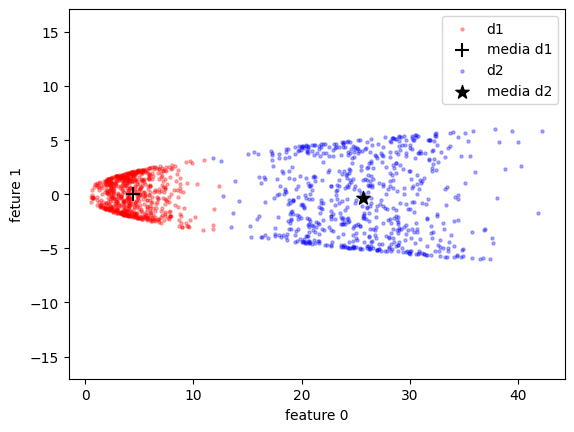

In [90]:
plot_dataset(tmpdataset,y2_train)#
accuracyLR, accuracyKNN  = compare_accuracy(tmpdataset,y2_train)